# Parametric Regression Models

## Machine Learning Methods 


### Module 3: Parametric Regression Models

### Instructor: Farhad Pourkamali



### Overview 
<hr style="border:2px solid gray">

1. Linear regression: Problem formulation, assumption, loss function, gradient (https://youtu.be/7bzSIX2I2Uk)
2. Linear regression in Scikit-learn (https://youtu.be/faW0Zo9CTQ8)
3. Evaluation metrics (https://youtu.be/faW0Zo9CTQ8)
4. Gradient descent (GD) and variants (https://youtu.be/0EV6UoKM4AM)
5. Nonlinear extension and regularization (https://youtu.be/OIoe4OQo1ko)

<img src="https://github.com/farhad-pourkamali/MATH4388Online/blob/main/images/ml_general.png?raw=true" width=600>


# 1. Linear regression: Problem formulation, assumption, loss function, gradient


### Case study: univariate linear regression
<hr style="border:2px solid gray">
   
* Training data: $\mathcal{D}=\{(x_n,y_n)\}_{n=1}^N$

* Parametric model: $f(x)=\theta_0+\theta_1 x$

* Objective: Choose $\theta_0,\theta_1$ such that $f(x_n)$ is close to $y_n$ 

* Mean squared error (MSE): 

$$
\mathcal{L}(\theta_0, \theta_1)=\frac{1}{N}\sum_{n=1}^N \big(y_n - f(x_n)\big)^2
$$



### Solving the optimization problem

<hr style="border:2px solid gray">

* We'll need the concept of partial derivatives

* To compute $\partial \mathcal{L}/\partial \theta_0$, take the  derivative with respect to $\theta_0$, treating the rest of the arguments as constants

* We can show that 

$$\frac{\partial \mathcal{L}}{\partial \theta_0}=\frac{-2}{N}\sum_{n=1}^N\big(y_n-\theta_0-\theta_1x_n\big)=\frac{2}{N}\sum_{n=1}^N\big(f(x_n)- y_n\big)$$

$$\frac{\partial \mathcal{L}}{\partial \theta_1}=\frac{-2}{N}\sum_{n=1}^N\big(y_n-\theta_0-\theta_1x_n\big)x_n=\frac{2}{N}\sum_{n=1}^N\big(f(x_n)- y_n\big)x_n$$

### Gradient 
<hr style="border:2px solid gray">


* Extend the notion of derivatives to handle vector-argument functions
    + Given $\mathcal{L}:\mathbb{R}^d\mapsto \mathbb{R}$, where $d$ is the number of input variables
    
    $$\nabla \mathcal{L}=\begin{bmatrix}\frac{\partial \mathcal{L}}{\partial \theta_0}\\ \vdots\\ \frac{\partial \mathcal{L}}{\partial \theta_{d-1}} \end{bmatrix}\in\mathbb{R}^d$$
    
* Example from the previous slide ($d=2$): 

$$\nabla \mathcal{L}=\frac{2}{N}\begin{bmatrix}\sum_{n=1}^N\big(f(x_n) - y_n\big)\\ \sum_{n=1}^N\big(f(x_n) - y_n\big)x_n \end{bmatrix}\in\mathbb{R}^2$$

### Compact form of gradient 
<hr style="border:2px solid gray">

* Let us define  

$$\mathbf{X}=\begin{bmatrix} 1 & x_1\\ \vdots & \vdots \\ 1 & x_N \end{bmatrix}\in\mathbb{R}^{N\times 2}, \boldsymbol{\theta}=\begin{bmatrix}\theta_0 \\ \theta_1\end{bmatrix}\in\mathbb{R}^{2}, \mathbf{y}=\begin{bmatrix}y_1 \\ \vdots \\ y_N\end{bmatrix}\in\mathbb{R}^{N}$$

* Hence, we get 

$$\mathbf{X}\boldsymbol{\theta} - \mathbf{y}=\begin{bmatrix}f(x_1) - y_1 \\ \vdots \\ f(x_N) - y_N\end{bmatrix}$$

### Compact form of gradient 
<hr style="border:2px solid gray">

* The last step is to show that $\nabla \mathcal{L}$ can be written as 

$$\frac{2}{N}\mathbf{X}^T\big(\mathbf{X}\boldsymbol{\theta} - \mathbf{y}\big)=\frac{2}{N}\begin{bmatrix} 1 & \ldots & 1\\x_1 & \ldots & x_N\end{bmatrix}\begin{bmatrix}f(x_1) - y_1 \\ \vdots \\ f(x_N) - y_N\end{bmatrix}=\frac{2}{N}\begin{bmatrix}\sum_{n=1}^N\big(f(x_n) - y_n\big)\\ \sum_{n=1}^N\big(f(x_n) - y_n\big)x_n \end{bmatrix}$$

* Given this compact form, we can use NumPy to solve the linear matrix equation

$$\underbrace{\mathbf{X}^T\mathbf{X}}_{a}\boldsymbol{\theta}=\underbrace{\mathbf{X}^T\mathbf{y}}_{b}$$

In [1]:
# GDP data 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv("https://github.com/ageron/data/raw/main/lifesat/lifesat.csv")
                 
df.head()

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               27 non-null     object 
 1   GDP per capita (USD)  27 non-null     float64
 2   Life satisfaction     27 non-null     float64
dtypes: float64(2), object(1)
memory usage: 780.0+ bytes


In [3]:
# Input features and labels (or outcomes) for the regression problem 

X = df['GDP per capita (USD)'].to_numpy()
y = df['Life satisfaction'].to_numpy()

print(X.shape, y.shape)

(27,) (27,)


In [4]:
X

array([26456.38793813, 27287.08340093, 28384.98778463, 29932.49391006,
       31007.76840654, 32181.15453723, 32238.15725928, 35638.42135118,
       36215.44759073, 36547.73895598, 36732.03474403, 38341.30757041,
       38992.14838075, 41627.12926943, 42025.61737306, 42404.39373816,
       45856.62562648, 47260.80045844, 48210.03311134, 48697.83702825,
       50683.32350972, 50922.35802345, 51935.60386182, 52279.72885136,
       54209.56383573, 55938.2128086 , 60235.7284917 ])

In [5]:
X.reshape(-1,1)

array([[26456.38793813],
       [27287.08340093],
       [28384.98778463],
       [29932.49391006],
       [31007.76840654],
       [32181.15453723],
       [32238.15725928],
       [35638.42135118],
       [36215.44759073],
       [36547.73895598],
       [36732.03474403],
       [38341.30757041],
       [38992.14838075],
       [41627.12926943],
       [42025.61737306],
       [42404.39373816],
       [45856.62562648],
       [47260.80045844],
       [48210.03311134],
       [48697.83702825],
       [50683.32350972],
       [50922.35802345],
       [51935.60386182],
       [52279.72885136],
       [54209.56383573],
       [55938.2128086 ],
       [60235.7284917 ]])

In [6]:
np.ones((X.shape[0],1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [7]:
# add the column of all 1's 

def add_column(X):
    '''
    add the column of all 1's 
    '''
    return np.concatenate(( np.ones((X.shape[0],1)), X.reshape(-1,1) ), axis=1)

Xcon = add_column(X)

Xcon.shape

(27, 2)

In [8]:
Xcon

array([[1.00000000e+00, 2.64563879e+04],
       [1.00000000e+00, 2.72870834e+04],
       [1.00000000e+00, 2.83849878e+04],
       [1.00000000e+00, 2.99324939e+04],
       [1.00000000e+00, 3.10077684e+04],
       [1.00000000e+00, 3.21811545e+04],
       [1.00000000e+00, 3.22381573e+04],
       [1.00000000e+00, 3.56384214e+04],
       [1.00000000e+00, 3.62154476e+04],
       [1.00000000e+00, 3.65477390e+04],
       [1.00000000e+00, 3.67320347e+04],
       [1.00000000e+00, 3.83413076e+04],
       [1.00000000e+00, 3.89921484e+04],
       [1.00000000e+00, 4.16271293e+04],
       [1.00000000e+00, 4.20256174e+04],
       [1.00000000e+00, 4.24043937e+04],
       [1.00000000e+00, 4.58566256e+04],
       [1.00000000e+00, 4.72608005e+04],
       [1.00000000e+00, 4.82100331e+04],
       [1.00000000e+00, 4.86978370e+04],
       [1.00000000e+00, 5.06833235e+04],
       [1.00000000e+00, 5.09223580e+04],
       [1.00000000e+00, 5.19356039e+04],
       [1.00000000e+00, 5.22797289e+04],
       [1.000000

* `np.concatenate` Explanation
    * Purpose: 
        * Combines (concatenates) multiple arrays into a single array along a specified axis.
    * Input: 
        * A tuple or list of arrays to concatenate, all with the same shape except in the concatenation axis.
    * Axis:
        * Defines the dimension along which the arrays will be joined.
        * Default: axis=0 (rows are stacked for 2D arrays).
        * For axis=1, arrays are concatenated column-wise.
    * Shape Requirement:
        * All arrays must have the same shape in dimensions other than the specified axis.
    * Output:
        * A new array that is the concatenation of the input arrays along the specified axis.

In [9]:
# solve the problem 

a = np.matmul(np.transpose(Xcon), Xcon)

b = np.matmul(np.transpose(Xcon), y)

theta = np.linalg.lstsq(a, b, rcond=None)[0] # Cut-off ratio for small singular values

print(theta)

[3.74904943e+00 6.77889970e-05]


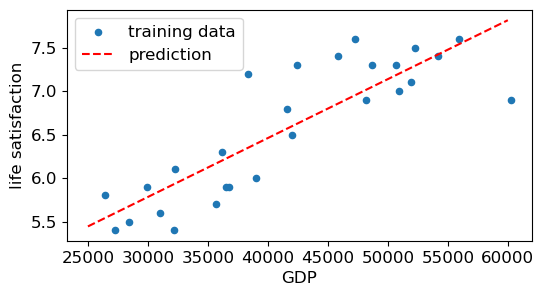

In [10]:
# plot the prediction model f

def f(X, theta):
    return np.matmul(X, theta)

plt.rcParams.update({'font.size': 12, "figure.figsize": (6,3)})
plt.scatter(X, y, s=20, label='training data')

X_test = np.array([25000, 60000])
y_test = f(add_column(X_test), theta)
plt.plot(X_test, y_test, 'r--', label='prediction')

plt.legend()
plt.xlabel('GDP')
plt.ylabel('life satisfaction')
plt.show()

### Linear models for regression
<hr style="border:2px solid gray">

* Given the training data set $\mathcal{D}=\{(\mathbf{x}_n,y_n)\}_{n=1}^N$ and an input vector $\mathbf{x}\in\mathbb{R}^D$, the linear regression model takes the form

$$f(\mathbf{x})=\theta_0+\theta_1x_1+\theta_2x_2+\ldots+\theta_Dx_D=\theta_0+\boldsymbol{\theta}^T\mathbf{x}$$
    
* $\boldsymbol{\theta}\in\mathbb{R}^D$: weights or regression coefficients, $\theta_0$: intercept or bias term

* Compact representation by defining $\mathbf{x}=[\color{red}{x_0=1},x_1,\ldots,x_D]$ and $\boldsymbol{\theta}=[\theta_0,\theta_1,\ldots,\theta_D]$ in $\mathbb{R}^{D+1}$

$$f(\mathbf{x})=\boldsymbol{\theta}^T\mathbf{x}=\langle \boldsymbol{\theta}, \mathbf{x}\rangle$$

### Loss function for linear regression
<hr style="border:2px solid gray">

* MSE loss function for a linear regression model

$$\mathcal{L}(\boldsymbol{\theta})=\frac{1}{N}\sum_{n=1}^N\big(y_n-\langle \boldsymbol{\theta},\mathbf{x}_n\rangle\big)^2=\frac{1}{N}\|\mathbf{y}-\mathbf{X}\boldsymbol{\theta}\|_2^2$$

where we have

$$\mathbf{X}=\begin{bmatrix}\rule[.5ex]{1em}{0.4pt}\mathbf{x}_1^T \rule[.5ex]{1em}{0.4pt}\\ \vdots\\\rule[.5ex]{1em}{0.4pt}\mathbf{x}_N^T \rule[.5ex]{1em}{0.4pt}\end{bmatrix}\in\mathbb{R}^{N\times (D+1)}, \boldsymbol{\theta}=\begin{bmatrix}
\theta_0\\\theta_1\\ \vdots \\\theta_{D}\end{bmatrix}\in\mathbb{R}^{D+1},\;\mathbf{y}=\begin{bmatrix}y_1\\y_2\\ \vdots\\y_N\end{bmatrix}\in\mathbb{R}^N, $$

* Optimization problem for model fitting/training: $\underset{\boldsymbol{\theta}\in\mathbb{R}^{D+1}}{\operatorname{argmin}} \mathcal{L}(\boldsymbol{\theta})$




### The Normal equation
<hr style="border:2px solid gray">

* To find the value of $\boldsymbol{\theta}$ that minimizes the MSE, there exists a *closed-form* solution
    * a mathematical equation that gives the result directly
    
* The gradient takes the form 

$$\nabla \mathcal{L}(\boldsymbol{\theta})= \frac{2}{N}\mathbf{X}^T\big(\mathbf{X}\boldsymbol{\theta} - \mathbf{y}\big)$$

* Normal equation

$$\boldsymbol{\theta}^*=\big(\mathbf{X}^T\mathbf{X}\big)^{-1}\mathbf{X}^T\mathbf{y}$$

# 2. Linear regression in Scikit-learn

* Import the `LinearRegression` class from `sklearn.linear_model`.
* Create an instance of the model.
```Python 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
```
* Use the `.fit()` method to train the model on your data.
    * Pass the feature matrix (X) and target vector (y) to the method.
    
```Python 
model.fit(X, y)
```
* Use the `.predict()` method to predict target values for new data points.

```Python
predictions = model.predict(new_X)

```
* Attributes
    * `.coef_`: The coefficients (weights) for the linear equation.
    * `.intercept_`: The intercept term (bias) of the linear model.


In [11]:
from sklearn.linear_model import LinearRegression

# Revisit the GDP data by preprocessing input features 

from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

X_minmax = minmax.fit_transform(X.reshape(-1,1))

reg = LinearRegression()

reg.fit(X_minmax, y) # X should be a 2D array 

print(reg.intercept_, reg.coef_)

5.542501428448674 [2.28986761]


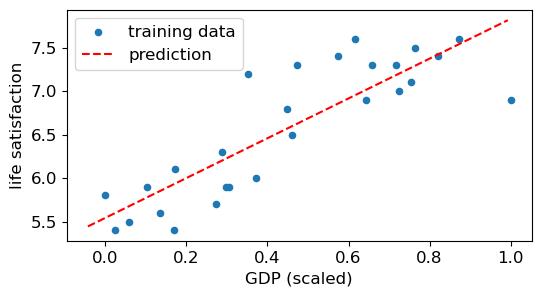

In [12]:
# Plot the prediction model 

plt.rcParams.update({'font.size': 12, "figure.figsize": (6,3)})
plt.scatter(X_minmax, y, s=20, label='training data')

X_test = np.array([25000, 60000]).reshape(-1,1)
X_test_minmax = minmax.transform(X_test)
plt.plot(X_test_minmax, reg.predict(X_test_minmax), 'r--', label='prediction')

plt.legend()
plt.xlabel('GDP (scaled)')
plt.ylabel('life satisfaction')
plt.show()

# 3. Evaluation metrics

* The quality of a regression model can be assessed using various quantities
    * See https://scikit-learn.org/stable/modules/model_evaluation.html

* Mean squared error 

$$\text{MSE}(\mathbf{y}, \hat{\mathbf{y}})=\frac{1}{N_{\text{test}}}\sum_{n=1}^{N_{\text{test}}} \big(y_n - \hat{y}_n\big)^2$$

* The value you get after calculating MSE is a squared unit of output
    
* If you have outliers in the data set, then it penalizes the outliers most 
    
* Possible solution: the output value you get is in the same unit as the required output variable

$$\text{RMSE}(\mathbf{y}, \hat{\mathbf{y}})=\sqrt{\frac{1}{N_{\text{test}}}\sum_{n=1}^{N_{\text{test}}} \big(y_n - \hat{y}_n\big)^2}$$

In [13]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error

y_true = [3, -1, 2, 7]
y_pred = [3, 0, 2, 7]

# If True returns MSE value, if False returns RMSE value.
print('MSE: ', mean_squared_error(y_true, y_pred), 
      ', RMSE: ', root_mean_squared_error(y_true, y_pred))

MSE:  0.25 , RMSE:  0.5


### R² score or the coefficient of determination
<hr style="border:2px solid gray">

* Definition 

$$R^2(\mathbf{y}, \hat{\mathbf{y}}) = 1 - \frac{\sum_{n=1}^{N_{\text{test}}} (y_n - \hat{y}_n)^2}{\sum_{n=1}^{N_{\text{test}}} (y_n - \bar{y})^2},\;\;\bar{y} = \frac{1}{N_{\text{test}}} \sum_{n=1}^{N_{\text{test}}} y_n$$

* RSS (Residual Sum of Squares) measures the amount of variability that is left unexplained 

$$\text{RSS}=\sum_{n=1}^{N_{\text{test}}} (y_n - \hat{y}_n)^2$$

* Best possible score is 1.
* An $R^2$ score of 0 in a regression model means that the model's predictions are no better than simply predicting the mean of the target variable for all data points.

* A negative $R^2$ is a signal to revisit the model design or data preparation steps. 


In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Data where the model performs poorly
X = np.array([[1], [2], [3]])
y = np.array([10, 20, 30])  # Actual target values
y_bad_pred = np.array([40, 50, 60])  # Poor predictions

# Calculate R² manually
ss_res = np.sum((y - y_bad_pred)**2)  # Residual sum of squares
ss_tot = np.sum((y - np.mean(y))**2)  # Total sum of squares
r2 = 1 - (ss_res / ss_tot)

print("R² score:", r2)

R² score: -12.5


### Explained variance score
<hr style="border:2px solid gray">

* Definition

$$\text{EV}(\mathbf{y}, \hat{\mathbf{y}}) = 1 - \frac{Var\{ \mathbf{y} - \hat{\mathbf{y}}\}}{Var\{\mathbf{y}\}}
$$

* The best possible score is 1.0, lower values are worse.

* When the residuals (i.e., $e_n=y_n-\hat{y}_n$) have zero mean, the explained variance score and the $R^2$ score are identical.

# 4. Gradient descent (GD) and variants

* Optimization problem for model fitting/training: $\underset{\boldsymbol{\theta}\in\mathbb{R}^{D+1}}{\operatorname{argmin}} \mathcal{L}(\boldsymbol{\theta})$

* Tweak parameters $\boldsymbol{\theta}$ iteratively to minimize the loss function
$\mathcal{L}(\boldsymbol{\theta})$


* At each iteration $t$, perform an update to decrease the loss function

$$\boldsymbol{\theta}_{t+1}=\boldsymbol{\theta}_t - \eta_t \nabla \mathcal{L}(\boldsymbol{\theta}_t)$$

where $\eta_t$ is the step size or learning rate

* If the learning rate is too small, then the algorithm will have to go through many iterations to converge

* The algorithm may diverge when the learning rate is too high 

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):  # Objective function
    return x ** 2

def f_grad(x):  # Gradient (derivative) of the objective function
    return 2 * x

def gd(eta, f_grad):
    x = 10.0  # initial solution 
    results = [x]
    for i in range(5):
        x = x - eta * f_grad(x)
        results.append(float(x))
    return results

In [16]:
def show_trace(results, f):
    # Define the range of the plot based on the solutions
    n = max(abs(min(results)), abs(max(results)))
    f_line = np.arange(-n, n, 0.1)
    
    # Plot the function
    plt.plot(f_line, [f(x) for x in f_line], 'r-', label='Function f(x)')
    
    # Plot the solution path
    plt.plot(results, [f(x) for x in results], 'bo-', label='Gradient Descent Path')
    
    # Annotate each solution point with the iteration number
    for i, x in enumerate(results):
        plt.text(x, f(x), f'{i}', color='blue', fontsize=10,
                 ha='right', va='bottom')
    
    # Add labels and legend for better clarity
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    
    # Show the plot
    plt.show()


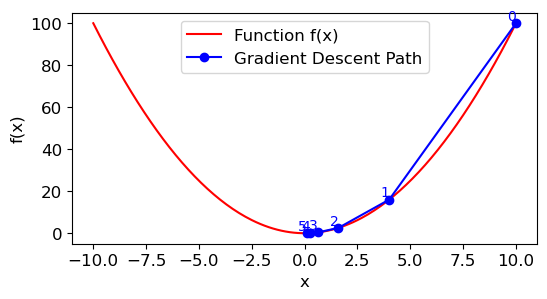

In [23]:
show_trace(gd(0.3, f_grad), f)

### Batch GD for linear regression
<hr style="border:2px solid gray">

* Recall the gradient vector of the loss function

$$\nabla \mathcal{L}(\boldsymbol{\theta})= \frac{2}{N}\mathbf{X}^T\big(\mathbf{X}\boldsymbol{\theta} - \mathbf{y}\big)$$

* GD step with fixed learning rate

$$\boldsymbol{\theta}_{t+1}=\boldsymbol{\theta}_t - \eta \nabla \mathcal{L}(\boldsymbol{\theta}_t)=\boldsymbol{\theta}_t - \eta \frac{2}{N}\mathbf{X}^T\big(\mathbf{X}\boldsymbol{\theta}_t - \mathbf{y}\big) $$

* This formula involves calculations over the full training set $\mathbf{X}$ --> batch or full GD
* An epoch means one complete pass of the training data set 



In [24]:
# GDP data 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv("https://github.com/ageron/data/raw/main/lifesat/lifesat.csv")

X = df['GDP per capita (USD)'].to_numpy()
y = df['Life satisfaction'].to_numpy()

def add_column(X):
    '''
    add the column of all 1's 
    '''
    return np.concatenate(( np.ones((X.shape[0],1)), X.reshape(-1,1)), axis=1)

In [26]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

X_minmax = minmax.fit_transform(X.reshape(-1,1))

Xcon = add_column(X_minmax)

print(Xcon[:5])

[[1.         0.        ]
 [1.         0.02459182]
 [1.         0.05709406]
 [1.         0.10290627]
 [1.         0.13473858]]


In [27]:
# Implementation of Batch GD 

eta = 0.01  # learning rate
n_epochs = 1000
N = len(Xcon)  # number of instances

np.random.seed(3)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / N * Xcon.T @ (Xcon @ theta - y.reshape(-1,1))
    theta = theta - eta * gradients
    
print(theta)

[[5.54877943]
 [2.27673633]]


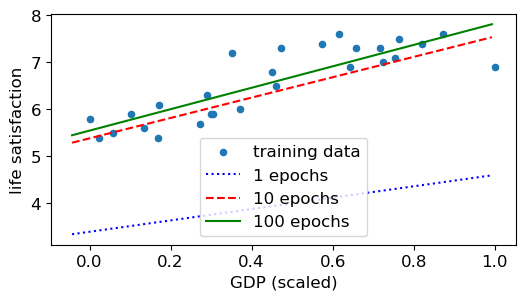

In [30]:
# Impact of eta (step size)
np.random.seed(3)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

X_test = np.array([25000, 60000]).reshape(-1,1)
X_test_minmax = add_column(minmax.transform(X_test))

plt.scatter(X_minmax, y, s=20, label='training data')

eta= .1 # 0.001, 0.01, 0.1
for epoch in range(n_epochs):
    gradients = 2 / N * Xcon.T @ (Xcon @ theta - y.reshape(-1,1))
    theta = theta - eta * gradients
    if epoch == 1: 
        plt.plot(X_test_minmax[:,1], X_test_minmax@theta , 'b:', label='1 epochs')
    elif epoch == 10:
        plt.plot(X_test_minmax[:,1], X_test_minmax@theta , 'r--', label='10 epochs')
    elif epoch == 100:
        plt.plot(X_test_minmax[:,1], X_test_minmax@theta , 'g-', label='100 epochs')           
plt.legend()
plt.xlabel('GDP (scaled)')
plt.ylabel('life satisfaction')
plt.show()

### Stochastic gradient descent (SGD) for linear regression
<hr style="border:2px solid gray">

* The main problem with GD is that it uses the whole training set at every step 
* Consider a minibatch of size $B=1$ and a selected sample $\mathbf{x}_n^T$ from $\mathbf{X}$ (row vector)

$$\nabla \mathcal{L}(\boldsymbol{\theta})=\frac{2}{N}\mathbf{X}^T(\mathbf{X}\boldsymbol{\theta}-\mathbf{y}) \Rightarrow 2\mathbf{x}_n(\mathbf{x}_n^T\boldsymbol{\theta}-y_n)$$

$$\boldsymbol{\theta}_{t+1}=\boldsymbol{\theta}_t - 2\mathbf{x}_n(\mathbf{x}_n^T\boldsymbol{\theta}-y_n)$$

* Given that $N$ is the sample size and $B$ is the batch size, in one epoch we update our model $N/B$ times
  

In [31]:
n_epochs = 5
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

# Loop over the number of epochs (complete passes over the data)
for epoch in range(n_epochs):
    # Loop over individual data points
    for iteration in range(N): #(N/B, B=1)
        # Select a random index for the current data point
        random_index = np.random.randint(N)
        
        # Extract xi and yi
        xi = np.transpose(Xcon[random_index : random_index + 1])
        yi = y[random_index : random_index + 1]
        
        # Compute the gradient of the loss function
        gradients = 2 * xi @ (xi.T @ theta - yi)  # for SGD, do not divide by N
        
        # The learning schedule decreases the learning rate over time
        eta = learning_schedule(epoch * N + iteration)
        
        # Update the parameter vector (theta)
        theta = theta - eta * gradients
        
print(theta)

[[5.56898107]
 [2.27782555]]


* Sklearn implementation of SGD for linear regression
    * https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

    * Parameters
        * max_iter: epochs
        * learning_rate: constant or variable
        * n_iter_no_change: number of iterations with no improvement to wait before stopping fitting

In [32]:
# GDP data 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor

X = df['GDP per capita (USD)'].to_numpy().reshape(-1,1)
y = df['Life satisfaction'].to_numpy()

pipe = Pipeline([('preprocess', MinMaxScaler()), 
                 ('reg', SGDRegressor(random_state=42))])

pipe.fit(X, y)

print(pipe['reg'].intercept_, pipe['reg'].coef_)


[5.35324059] [2.47088247]


# 5. Nonlinear extension and regularization 


* The linear model may not be a good fit for many problems 
    * We can improve the fit by using a polynomial regression model of degree $d$

$$f(x)=\boldsymbol{\theta}^T\phi(x)$$

where $\phi(x)=[1,x,x^2,\ldots,x^d]$

* This is a simple example of feature preprocessing/engineering
    * Benefit: linear function of parameters but nonlinear wrt input features

* We can use [sklearn.preprocessing.PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) to generate polynomial features
    * Use pipeline in sklearn to assemble several steps (preprocessing + estimator)
    
* In the following, we generate a synthetic model of the form:

$$
y = 0.5x^2 + x + 2 + \text{noise}
$$
where the noise represents random variations added to simulate real-world data.


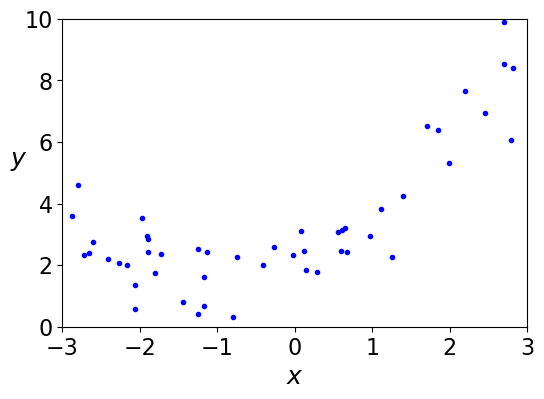

In [33]:
# Generate simulated data 
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
plt.rcParams.update({'font.size': 16, "figure.figsize": (6,4)})

N = 50
X = 6 * np.random.rand(N, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(N, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

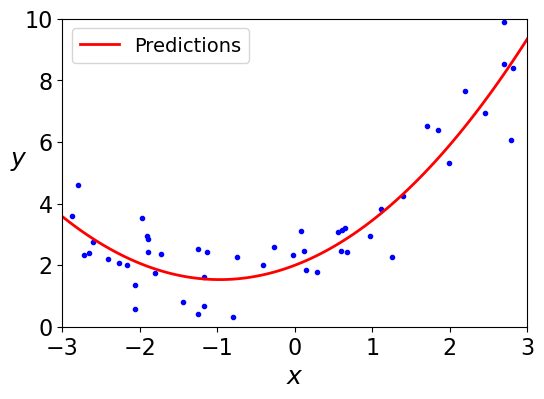

In [34]:
# train polynomial model 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('regr', LinearRegression())])

pipe.fit(X, y) # training 

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
y_new = pipe.predict(X_new) # prediction

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

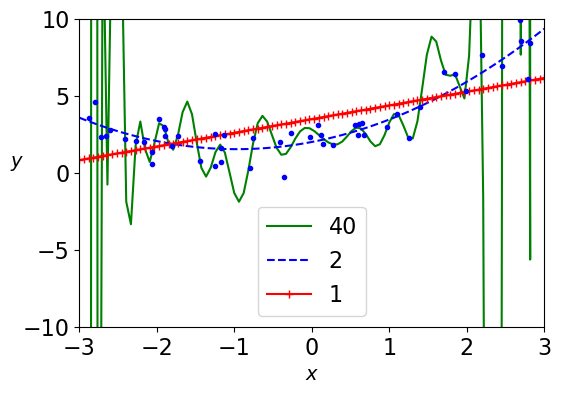

In [35]:
# Compare varying complexity levels

from sklearn.preprocessing import StandardScaler

for style, degree in (("g-", 40), ("b--", 2), ("r-+", 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([("poly_features", polybig_features),
                                      ("std_scaler", std_scaler),
                                      ("lin_reg", lin_reg)])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree))  
    
plt.plot(X, y, "b.", linewidth=3)  
plt.legend()
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.axis([-3, 3, -10, 10])
plt.show()


### The bias-variance tradeoff
<hr style="border:2px solid gray">

* A model's generalization (or test) error can be decomposed into three components:

    * Bias: Error introduced by approximating a real-world problem, which may be complex, by a simplified model.
        * High bias models make strong assumptions about the data, potentially leading to underfitting, where the model fails to capture underlying patterns.
    * Variance: Error introduced by the model's sensitivity to small fluctuations in the training set.
        * High variance models are overly sensitive to training data variations, leading to overfitting, where the model captures noise rather than the intended outputs.
    * Irreducible Error: Error inherent in the data itself, due to noise or other unpredictable factors, which cannot be reduced by any model.
    
* Model flexibility and error relationship
    * As a model's flexibility (complexity) increases, its training error typically decreases because it can fit the training data more closely.
    * However, the test error often follows a U-shaped curve:
        * With low flexibility, both training and test errors are high due to underfitting.
        * With moderate flexibility, test error decreases as the model captures the underlying data patterns.
        * Beyond a certain point, increasing flexibility leads to overfitting, causing test error to rise even as training error continues to decline.

* This balance between bias and variance is known as the bias-variance tradeoff. Achieving optimal model performance involves finding the right level of complexity that minimizes test error by appropriately balancing bias and variance.

<img src="https://github.com/farhad-pourkamali/MATH4388Online/blob/main/images/tradeoff.png?raw=true" height=400 width=600>

### Regularization
<hr style="border:2px solid gray">

* Regularization adds a penalty term to the model's loss function to discourage excessive complexity.

* Common regularization techniques:
    * L1 Regularization (Lasso): Adds the sum of the absolute values of coefficients as a penalty.
    * L2 Regularization (Ridge): Adds the sum of the squares of coefficients as a penalty.
    * Elastic Net: Combines L1 and L2 penalties.
* By discouraging large weights, it prevents the model from overfitting small variations or noise in the training data.

* Mathematical representation

$$\mathcal{L}(\boldsymbol{\theta})=\|\mathbf{y}-\mathbf{X}\boldsymbol{\theta}\|_2^2+\lambda C(\boldsymbol{\theta})$$
    
    
    * $\lambda\geq 0$ is the regularization parameter (i.e., hyperparameter) and $C(\boldsymbol{\theta})$ is some form of model complexity. 
    * We can quantify complexity using the L2 regularization formula, i.e., the sum of the squares of all weights

$$\ell_2 \text{ regularization}: C(\boldsymbol{\theta})=\|\boldsymbol{\theta}\|_2^2=\theta_0^2+\theta_1^2+\theta_2^2+\ldots$$


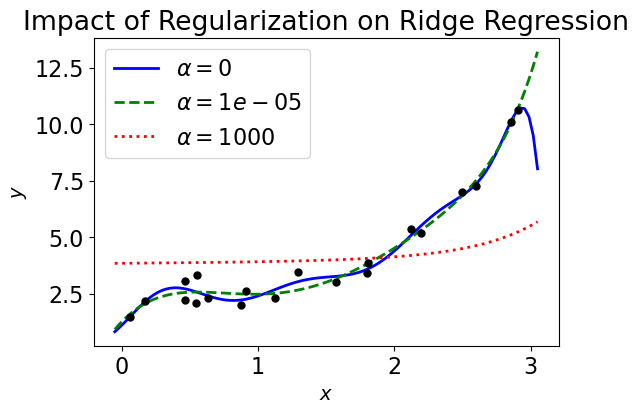

In [36]:
# Synthetic/Simulated Data (Ridge Regression or L2)
from sklearn.linear_model import Ridge
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Seed for reproducibility
np.random.seed(42)

# Generate synthetic data with a cubic relationship
N = 20
X = 3 * np.random.rand(N, 1)
y = 2 + 0.5 * X**3 - 0.8 * X**2 + X + np.random.randn(N, 1) / 2  # Cubic function with noise
X_new = np.linspace(0-0.05, 3+0.05, 100).reshape(100, 1)

# Regularization strengths to explore
alphas = (0, 10**-5, 1000)

# Iterate through different alpha values and plot the results
for alpha, style in zip(alphas, ("b-", "g--", "r:")):  # zip aggregates alphas and styles
    model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),  # 10th degree polynomial
        ("std_scaler", StandardScaler()),  # Standardize features
        ("regul_reg", Ridge(alpha=alpha)),  # Ridge regression with specified alpha
    ])
    model.fit(X, y)
    plt.plot(X_new, model.predict(X_new), style, linewidth=2, label=r"$\alpha = {}$".format(alpha))

# Plot the original data
plt.plot(X, y, "k.", markersize=10)  # Original data points
plt.legend()
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.title("Impact of Regularization on Ridge Regression")
plt.show()


* Synthetic data generation for comparing L1 (Lasso) vs L2 (Ridge):

    * The `make_regression` function is used to create a data set for regression tasks:
    * `n_samples=50`: 50 data points are generated.
    * `n_features=5`: The data has 5 features.
    * `n_informative=2`: Out of the 5 features, only 2 are truly informative (affect the target variable).
    * `noise=1`: Adds Gaussian noise to the target variable to make the problem more realistic.
    * `effective_rank=2`: Introduces correlations between features by generating a low-rank design matrix.
    * `coef=True`: Returns the coefficients of the underlying true model.


In [37]:
import numpy as np
from sklearn.linear_model import Lasso, Ridge
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Generate synthetic data with redundant features
np.random.seed(5)
X, y, coefficients = make_regression(
    n_samples=50,  # Number of samples
    n_features=5,  # Total features
    n_informative=2,  # Only 2 features are informative
    noise=1,  # Add some noise
    effective_rank =2,
    coef=True,  # Return the coefficients for the true model
)

print(coefficients)

[85.84989327  0.         25.73873511  0.          0.        ]


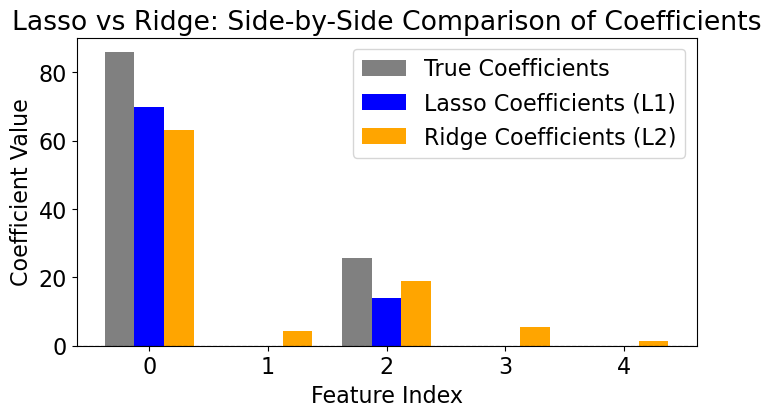

In [38]:
# Apply Lasso Regression
lasso = Lasso(alpha=0.1)  # L1 regularization strength
lasso.fit(X, y)

# Apply Ridge Regression
ridge = Ridge(alpha=0.1)  # L2 regularization strength
ridge.fit(X, y)

# Plotting side-by-side comparison
width = 0.25  # Width of the bars
x_indices = np.arange(len(coefficients))  # Indices for features

plt.figure(figsize=(8, 4))

# Plot True coefficients
plt.bar(x_indices - width, coefficients, width=width, label="True Coefficients", color='gray')

# Plot Lasso coefficients
plt.bar(x_indices, lasso.coef_, width=width, label="Lasso Coefficients (L1)", color='blue')

# Plot Ridge coefficients
plt.bar(x_indices + width, ridge.coef_, width=width, label="Ridge Coefficients (L2)", color='orange')

# Add labels and formatting
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Lasso vs Ridge: Side-by-Side Comparison of Coefficients")
plt.xticks(x_indices)
plt.legend()
plt.show()


* When features are highly correlated (as happens with `effective_rank=2`), Ridge struggles to distinguish between them, which can result in suboptimal generalization and interpretation.

* Lasso regression performs feature selection by setting some coefficients to zero. It eliminates redundant or less important features entirely.

### Recommended Reading
<hr style="border:2px solid gray">

* Chapters 3 and 5 of An Introduction to Statistical Learning With Applications in Python: https://www.statlearning.com/

* Chapter 4 of Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow: https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb

* Chapter 11 of Probabilistic Machine Learning: An Introduction: https://probml.github.io/pml-book/book1.html